In [307]:
# check if there are duplictaes in the clinical notes

import numpy as np
from collections import Counter

In [308]:
import pickle

df_train = pickle.load(open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_train_data.pickle', 'rb'))
df_val = pickle.load(open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_val_data.pickle', 'rb'))
df_test = pickle.load(open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_test_data.pickle', 'rb'))

In [415]:
sequence_length = None

notes_train = [n[:sequence_length] for n in df_train['notes']]
notes_val = [n[:sequence_length] for n in df_val['notes']]
notes_test = [n[:sequence_length] for n in df_test['notes']]

In [416]:
def checkIfDuplicates(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True

checkIfDuplicates(notes_train), checkIfDuplicates(notes_val), checkIfDuplicates(notes_test)

(True, True, True)

In [417]:
len(notes_train), len(set(notes_train)), len(notes_val), len(set(notes_val)), len(notes_test), len(set(notes_test))

(15018, 13781, 4695, 4403, 4711, 4424)

In [418]:
def getDupes(l):
    seen = set()
    seen_add = seen.add
    for x in l:
        if x in seen or seen_add(x):
            yield x

In [419]:
dupl_train = list(set([n for n in getDupes(notes_train)]))
dupl_val = list(set([n for n in getDupes(notes_val)]))
dupl_test = list(set([n for n in getDupes(notes_test)]))

In [420]:
assert dupl_train[0] in notes_train
assert dupl_val[0] in notes_val
assert dupl_test[0] in notes_test

In [421]:
checkIfDuplicates(set(dupl_train))

False

In [422]:
indices_train = [[i for i, x in enumerate(notes_train) if x == d] for d in set(dupl_train)]
indices_val = [[i for i, x in enumerate(notes_val) if x == d] for d in set(dupl_val)]
indices_test = [[i for i, x in enumerate(notes_test) if x == d] for d in set(dupl_test)]

In [423]:
indices_train[:5]

[[2209, 6167],
 [7801, 11494],
 [368, 11845, 12360, 12658, 14398],
 [13123, 14632],
 [5250, 8393]]

In [424]:
len(indices_train), len(indices_val), len(indices_test)

(1047, 255, 242)

In [425]:
#[df_train['labels'][i] for i in indices_train]

In [426]:
allduplicates_train = [len([i for i, x in enumerate(notes_train) if x == dupl_train[j]]) for j in range(len(dupl_train))]
allduplicates_val = [len([i for i, x in enumerate(notes_val) if x == dupl_val[j]]) for j in range(len(dupl_val))]
allduplicates_test = [len([i for i, x in enumerate(notes_test) if x == dupl_test[j]]) for j in range(len(dupl_test))]

In [427]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

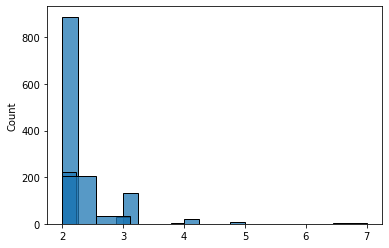

In [428]:
sns.histplot(allduplicates_train)
sns.histplot(allduplicates_val)
sns.histplot(allduplicates_test)

In [429]:
len(allduplicates_train), len(allduplicates_val), len(allduplicates_test)

(1047, 255, 242)

In [430]:
len(notes_train) - len(allduplicates_train), len(notes_val) - len(allduplicates_val), len(notes_test) - len(allduplicates_test)

(13971, 4440, 4469)

In [431]:
Counter(allduplicates_train), Counter(allduplicates_val), Counter(allduplicates_test)

(Counter({2: 889, 5: 6, 3: 132, 4: 20}),
 Counter({2: 222, 4: 4, 3: 29}),
 Counter({2: 207, 3: 32, 7: 2, 5: 1}))

In [432]:
# get all indices, but the first

indices_train_remove = [i[1:] for i in indices_train]
indices_val_remove = [i[1:] for i in indices_val]
indices_test_remove = [i[1:] for i in indices_test]

indices_train_keep = [i[0] for i in indices_train]
indices_val_keep = [i[0] for i in indices_val]
indices_test_keep = [i[0] for i in indices_test]

In [433]:
flat_list_train = np.asarray([item for sublist in indices_train_remove for item in sublist])
flat_list_val = np.asarray([item for sublist in indices_val_remove for item in sublist])
flat_list_test = np.asarray([item for sublist in indices_test_remove for item in sublist])

In [434]:
assert len(flat_list_train) == len(set(flat_list_train))
assert len(flat_list_val) == len(set(flat_list_val))
assert len(flat_list_test) == len(set(flat_list_test))

In [435]:
flat_list_train.sort()
flat_list_val.sort()
flat_list_test.sort()

indices_train_keep.sort()
indices_val_keep.sort()
indices_test_keep.sort()

In [436]:
train_indices = np.arange(len(notes_train))
val_indices = np.arange(len(notes_val))
test_indices = np.arange(len(notes_test))

In [437]:
# remove those indices from original data sets

In [438]:
mask = np.ones(len(notes_train), bool)
mask[flat_list_train] = False
print(train_indices[mask], len(train_indices[mask]))
df_train_new = {}
df_train_new['notes'] = df_train['notes'][mask]
df_train_new['labels'] = df_train['labels'][mask]
df_train_new['inputs'] = df_train['inputs'][mask]

[    0     1     2 ... 15015 15016 15017] 13781


In [439]:
mask = np.ones(len(notes_val), bool)
mask[flat_list_val] = False
print(val_indices[mask], len(val_indices[mask]))
df_val_new = {}
df_val_new['notes'] = df_val['notes'][mask]
df_val_new['labels'] = df_val['labels'][mask]
df_val_new['inputs'] = df_val['inputs'][mask]

[   0    1    2 ... 4692 4693 4694] 4403


In [440]:
mask = np.ones(len(notes_test), bool)
mask[flat_list_test] = False
print(test_indices[mask], len(test_indices[mask]))
df_test_new = {}
df_test_new['notes'] = df_test['notes'][mask]
df_test_new['labels'] = df_test['labels'][mask]
df_test_new['inputs'] = df_test['inputs'][mask]

[   0    1    2 ... 4708 4709 4710] 4424


In [306]:
# pickle dump

# pickle.dump(df_train_new, open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_train_data_unique.pickle', 'wb'))
# pickle.dump(df_val_new, open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_val_data_unique.pickle', 'wb'))
# pickle.dump(df_test_new, open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_test_data_unique.pickle', 'wb'))